# 手寫辨識使用篇

我們在前面的[手寫辨識](手寫辨識.ipynb)訓練好我們的神經網路, 可以做手寫辨識 0-9 的數字。現在我們要來用用看。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.datasets import mnist
from ipywidgets import interact_manual

Using Theano backend.


## 找回我們訓練好的神經網路

In [3]:
model = model_from_json(open('handwriting_model_architecture.json').read())
model.load_weights('handwriting_model_weights.h5')

In [4]:
model.compile(loss='mse', optimizer=SGD(lr=0.1))

## 備好我們的訓練資料

我們還是要備好兩種格式:

* x0_test: 28x28 矩陣, 可直接畫
* x_test: 784 (=28x28) 維向量, 可送進我們神經網路

In [5]:
(_,_), (x0_test, _) = mnist.load_data()

num_test = len(x0_test)
x_test = x0_test.reshape(num_test, 28*28)

## 測試資料送進去辨識

我們用 `predict_classes` 可以直接找結果向量裡面最大的, 也就是說回傳值就是預測的答案。

In [6]:
result = model.predict_classes(x_test)

 9984/10000 [============================>.] - ETA: 0s

## 欣賞辨識結果

In [7]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 1


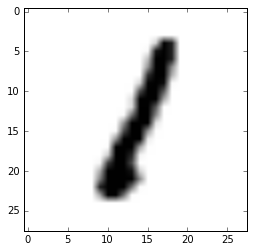

In [8]:
interact_manual(辨識, 測試編號 = (0, num_test-1));